<a href="https://colab.research.google.com/github/NikFloden/Art-Style-Transfer-Using-Neural-Networks/blob/main/Milestone_3_Transfer_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Objective
Use transfer learning to improve the accuracy of the CIFAR10 dataset. The purpose is to get experience using pretrained models.
##1. Load the CIFAR10 dataset, set up our model

In [11]:
from tensorflow.keras.datasets import cifar10
np.random.seed(2822) #gotta make it replicatable and stay the same across runnings
# Loads the cifar10 dataset
(x_train, y_train), (x_test, y_test)  = cifar10.load_data()

So first things first, let's look at the shape of our data:

In [12]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


Let's take a look at a random image for fun.

[2]


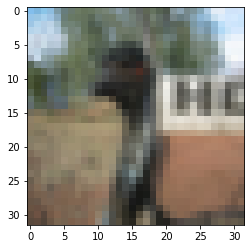

In [13]:
import numpy as np
import matplotlib.pyplot as plt

random_num = np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num])
print(y_train[random_num])

Looking at the dataset's webpage, the list is all uint8s, we gotta change that to floats and then norm the data to make it work simpler. 

In [14]:
img_rows = x_train[0].shape[0] #we're gonna need this later, I just know it. 
img_cols = x_train[0].shape[1]

# change our image type to float32 data type
x_train = x_train.astype('float32') #uint8 originally
x_test = x_test.astype('float32')

# Normalize our data by changing the range from (0 to 255) to (0 to 1)
x_train /= 255.0
x_test /= 255.0


Again on the theme of making things move smoother, let's one-hot encode the labels.

In [15]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]

Alright, it's time to set up the network. 

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import SGD 
import tensorflow as tf

input_shape = x_test[0].shape
#init the model
model = Sequential()

#First convolutional layer, using padding ='same' to maintain the output shape
model.add(Conv2D(32, 3, padding='same', input_shape=input_shape))
#first Activation layer
model.add(Activation('relu'))
#second convolutional layer
model.add(Conv2D(32, 3))
#second Activation layer
model.add(Activation('relu'))
#first pooling layer, using a kernel of 2,2
model.add(MaxPooling2D(pool_size=(2, 2)))
#dropout layer
model.add(Dropout(0.5))
#third convolutional layer, using padding agin to maintain the output shape, but increasing the filters to 64
model.add(Conv2D(64, 3, padding ='same'))
#third activation layer
model.add(Activation('relu'))
#Fourth convolutional layer, same # of filters as the third
model.add(Conv2D(64, 3))
#fourth activation layer
model.add(Activation('relu'))
#second pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))
#second dropout layer
model.add(Dropout(0.5))
#flatten layer
model.add(Flatten())
#dense layer
model.add(Dense(512))
#another activation layer
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))
model.compile(loss = 'categorical_crossentropy',
              optimizer = SGD(0.01),
              metrics = ['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 activation_6 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 activation_7 (Activation)   (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 15, 15, 32)        0         
                                                      

We got it right on the money, exactly what we want.
#2. The training montage

In [17]:
batch_size = 32
epochs = 10
from tensorflow.keras.callbacks import History

history = model.fit(x_train, y_train, batch_size, epochs, validation_data = (x_test, y_test)) #fit our model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

Epoch 1/10
1563/1563 [==============================] - 23s 14ms/step - loss: 2.1951 - accuracy: 0.1667 - val_loss: 1.9889 - val_accuracy: 0.2669
Epoch 2/10
1563/1563 [==============================] - 21s 14ms/step - loss: 1.8812 - accuracy: 0.2985 - val_loss: 1.6836 - val_accuracy: 0.3960
Epoch 3/10
1563/1563 [==============================] - 21s 14ms/step - loss: 1.6868 - accuracy: 0.3780 - val_loss: 1.5234 - val_accuracy: 0.4486
Epoch 4/10
1563/1563 [==============================] - 21s 14ms/step - loss: 1.5651 - accuracy: 0.4266 - val_loss: 1.4409 - val_accuracy: 0.4898
Epoch 5/10
1563/1563 [==============================] - 23s 15ms/step - loss: 1.4864 - accuracy: 0.4579 - val_loss: 1.3516 - val_accuracy: 0.5107
Epoch 6/10
1563/1563 [==============================] - 23s 14ms/step - loss: 1.4167 - accuracy: 0.4857 - val_loss: 1.2772 - val_accuracy: 0.5404
Epoch 7/10
1563/1563 [==============================] - 22s 14ms/step - loss: 1.3641 - accuracy: 0.5053 - val_loss: 1.2450 -

In [18]:
from tensorflow.keras.models import load_model
model.save('cfar10_deep_cnn_10_Epochs.h5')
print('model saved')
del(model)
model = load_model('cfar10_deep_cnn_10_Epochs.h5')

model saved


##3. Testing with some test images
We're gonna grab 5 and see what our model classifies it as.

8	7	7	7	1	

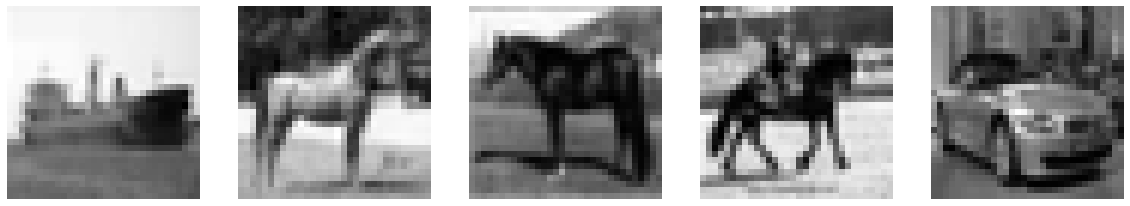

In [19]:
import numpy as np

figure = plt.figure(figsize=(20,20))


for i in range(5):
    figure.add_subplot(1,5,i+1)
    random_idx = np.random.randint(0,len(x_test))
    plt.imshow(x_test[random_idx,:,:,0],cmap="gray")
    plt.axis("off")
    print(np.squeeze(np.argmax(model.predict(x_test[random_idx].reshape(1,32,32,3)),axis=1),axis=0),end="\t")

So in a breakdown:



1.   From what I can tell, this image is of a ship and the model agrees.
2.   This is pretty obviously a horse, and the model classified it as a horse as well.
3. This appears to be a horse too and the model also classifies it as one.
4. A third horse, a third correct classification of a horse.
5. Definitely a car, classified as a car.

Well, I guess we got lucky with this sample. 100% accuracy in this sample. 



##4. Loading VGG16

In [32]:
from tensorflow.keras.applications import vgg16 as vgg
base_model = vgg.VGG16(weights='imagenet',
                      include_top=False,
                      input_shape=(32, 32, 3))

Extract the last layer from the third block of the VGG16 model. You’ll be reusing the VGG model up to block3_pool.

In [33]:
base_model.summary()
last = base_model.get_layer('block3_pool').output

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

Add classification layers for the CIFAR10 classes on top of it as shown in the figure:

In [34]:
from tensorflow.keras.layers import GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras import Model
x = GlobalAveragePooling2D()(last)
x = BatchNormalization()(x)
x = Dense(256, activation='relu')(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
# Make your top model
number_of_classes = 10
top = Dense(number_of_classes, activation='softmax')(x)
# Construct your full model now
model = Model(base_model.input, top)

Freeze the layers in VGG16 model.

In [35]:
for layer in base_model.layers:
    layer.trainable = False

In [36]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = SGD(0.01),
              metrics = ['accuracy'])
history = model.fit(x_train, y_train, batch_size, epochs, validation_data = (x_test, y_test)) #fit our model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

Epoch 1/10
1563/1563 [==============================] - 21s 12ms/step - loss: 1.5035 - accuracy: 0.4704 - val_loss: 1.1148 - val_accuracy: 0.6075
Epoch 2/10
1563/1563 [==============================] - 18s 12ms/step - loss: 1.1632 - accuracy: 0.5921 - val_loss: 0.9838 - val_accuracy: 0.6546
Epoch 3/10
1563/1563 [==============================] - 17s 11ms/step - loss: 1.0541 - accuracy: 0.6328 - val_loss: 0.9204 - val_accuracy: 0.6748
Epoch 4/10
1563/1563 [==============================] - 17s 11ms/step - loss: 0.9938 - accuracy: 0.6538 - val_loss: 0.8801 - val_accuracy: 0.6926
Epoch 5/10
1563/1563 [==============================] - 17s 11ms/step - loss: 0.9488 - accuracy: 0.6697 - val_loss: 0.8455 - val_accuracy: 0.7018
Epoch 6/10
1563/1563 [==============================] - 17s 11ms/step - loss: 0.9193 - accuracy: 0.6796 - val_loss: 0.8234 - val_accuracy: 0.7100
Epoch 7/10
1563/1563 [==============================] - 17s 11ms/step - loss: 0.8900 - accuracy: 0.6901 - val_loss: 0.8086 -

Well, the transfer model has a significantly better accuracy.